In [1]:
#!/usr/bin/python
# -*- coding: UTF-8 -*-

In [2]:
import csv #Import csv
from datetime import datetime
import jsonpickle
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import pandas as pd
import sys
import tweepy

In [3]:
#Google Trend API Wrapper
from pytrends.request import TrendReq
pytrends = TrendReq()

In [4]:
def GoogleTrendsNSDxMT(kw_list):
    """ Args:
        kw_list ([str]): keywords used in Google Trends, 'National Sandwich Day, Me Too'   
        
    Returns:
        GoogleTrendsNSDxMT_chart: line graph depicting search of keywords over time
        
    Raises:
        ValueError: Opps, something went wrong. Please check your syntax and try again. """
    #search items
    kw_list = ["National Sandwich Day", "Me too"] 
    
    #load paramaters for data, not necessary for all GoogleTrends API uses
    pytrends.build_payload(kw_list, timeframe='now 7-d', geo='US') 
    
    #actual pulling of data 
    GoogleTrendsNSDxMT_df=pytrends.interest_over_time()
    
    #parsing dataframe to the relevant columns
    GoogleTrendsNSDxMT_df=GoogleTrendsNSDxMT_df[['National Sandwich Day', 'Me too']]
    
    #plot chart
    GoogleTrendsNSDxMT_chart= GoogleTrendsNSDxMT_df.plot.line()

In [5]:
def GoogleTrendsiPXxWSG7(kw_list):
    """ Args:
        kw_list ([str]): keywords used in Google Trends, 'IPhone X, World Series Game 7'   
        
    Returns:
        GoogleTrendsiPXxWSG7_chart: line graph depicting search of keywords over time
        
    Raises:
        ValueError: Opps, something went wrong. Please check your syntax and try again. """
        
    
    #search items
    kw_list= [ "iPhone X","World Series Game 7"]
    
    #load parameters for data pull, not necessary for all Google Trends API uses
    pytrends.build_payload(kw_list, timeframe='now 7-d', geo='US')
    
    #actual pulling of data
    GoogleTrendsiPXxWSG7_df=pytrends.interest_over_time()
    
    #parsing dataframe down to relevant columns
    GoogleTrendsiPXxWSG7_df=GoogleTrendsiPXxWSG7_df[['iPhone X', 'World Series Game 7']]
    
    #plot chart
    GoogleTrendsiPXxWSG7_chart= GoogleTrendsiPXxWSG7_df.plot.line()

In this chart, we have one hashtag that was trending throughout the week and another that spiked on a specific day due to the events on that day. The “iPhoneX” hashtag was trending more throughout the week than the “World Series Game Seven” hashtag, but the World Series hashtag spiked on the 2nd , after the game aired on the 1st of November. Even though the iPhoneX was released over the weekend, there was still a pretty consistent buzz throughout the course of the week compared to the World Series hashtag which had close to zero tweets before the game occurred.

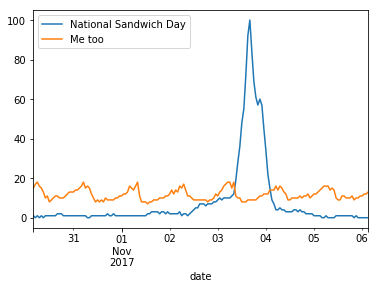

In [6]:
GoogleTrendsNSDxMT(['National Sandwich Day','Me too'])

Another example comparing a hashtag trending throughout the week with one that spiked on a specific day. The National Sandwich Day hashtag spiked on the 4th and had few tweets leading up to the “holiday”. The “Me Too” hashtag was consistently trending throughout the week without a spike. This makes me wonder if there was a point in time where this hashtag did spike like the “National Sandwich Day” one or if it has always been consistently trending like this past week. However, this brings the limitations of the Twitter API itself into question. We would probably need to use a different data visualization technique for this purpose.

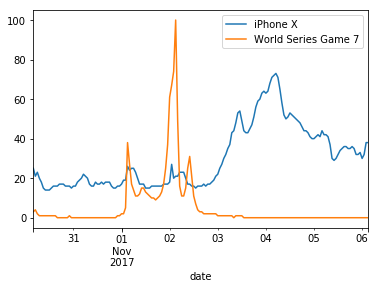

In [7]:
GoogleTrendsiPXxWSG7(['iPhone X','World Series Game 7'])

In [8]:

#Consumer Key 
API_KEY= 'QjyJ4Aa8xTm6Yyok0xHYC7q1b'
#Consumer Secret (Hey Don't Look!)
API_SECRET= 'QAKECWDILlUVQmwxmgzEfb50ajUdXuFhmkIbHbfhN6eXH9b9y2'


In [9]:
# Access Twitter, using AppAuth instead of OAuth to increase speed
auth = tweepy.AppAuthHandler(API_KEY, API_SECRET)

api = tweepy.API(auth, wait_on_rate_limit=True,
                   wait_on_rate_limit_notify=True)

if (not api):
    print ("Can't Authenticate")
    sys.exit(-1)


In [10]:
def hashtag_tweets(hashtag):
    """ Args:
        hashtag (str): hashtag whose tweets you want to grab   
        
    Returns:
        hashtag_tweets_chart: line graph depicting use of hashtag on a per hour basis over the course of a week
        hashtag_tweets.csv: csv file containing the timestamp of every tweet using the hashtag over 7 days and a count of total tweets for the hashtag
        
    Raises:
        TweepError: "some error : " + str(TweepError) """
   
    searchQuery = hashtag  # this is what we're searching for
    maxTweets = 10000000 # Some arbitrary large number
    tweetsPerQry = 100  # this is the max the API permits
    fname = 'hashtag_tweets.csv' #file to save tweet info

    csvFile = open('hashtag_tweets.csv', 'a') #open file where tweet info will be stored 
    csvwriter= csv.writer(csvFile, delimiter=' ') #automatically reads tweet data and parses
    csvwriter.writerow(['DateTime']) #only show the Timestamp for the tweets

    # If results from a specific ID onwards are reqd, set since_id to that ID.
    # else default to no lower limit, go as far back as API allows
    sinceId = None

    # If results only below a specific ID are, set max_id to that ID.
    # else default to no upper limit, start from the most recent tweet matching the search query.
    max_id = (-1)

    tweetCount = 0
    print("Downloading max {0} tweets".format(maxTweets)) #Graphical help to show progress
    with open(fname, 'w') as f:
        while tweetCount < maxTweets:
            try:
                if (max_id <= 0):
                    if (not sinceId):
                        new_tweets = api.search(q=searchQuery, count=tweetsPerQry)
                    else:
                        new_tweets = api.search(q=searchQuery, count=tweetsPerQry,
                                                since_id=sinceId)
                else:
                    if (not sinceId):
                        new_tweets = api.search(q=searchQuery, count=tweetsPerQry,
                                                max_id=str(max_id - 1))
                    else:
                        new_tweets = api.search(q=searchQuery, count=tweetsPerQry,
                                                max_id=str(max_id - 1),
                                                since_id=sinceId)
                if not new_tweets:
                    print("No more tweets found")
                    break
                for tweet in new_tweets:
                     csvwriter.writerow([tweet.created_at]) #recording the tweet info
                tweetCount += len(new_tweets)
                print("Downloaded {0} tweets".format(tweetCount))
                max_id = new_tweets[-1].id
            except tweepy.TweepError as e:
                # Just exit if any error
                print("some error : " + str(e))
                break

    print ("Downloaded {0} tweets, Saved to {1}".format(tweetCount, fname))
    
    csvFile.close()
    
    hashtag_tweets_df= pd.read_csv('../FinalProject/hashtag_tweets.csv') #read tweet info
    hashtag_tweets_df.insert(1, 'Tweet Count', range(len(hashtag_tweets_df))) #insert column to count tweets
    hashtag_tweets_df['DateTime'] = pd.to_datetime(hashtag_tweets_df['DateTime']) #making sure it recognizes the entries as timestamps
   
    ts = hashtag_tweets_df.set_index('DateTime')
    hashtag_tweets_df= ts.resample('H').count() #shows the count of number of entries per hour, will help with graphical processing
    
    hashtag_tweets_chart=hashtag_tweets_df.plot.line(legend=False) #plot the chart

Downloaded 26 tweets
No more tweets found
Downloaded 26 tweets, Saved to hashtag_tweets.csv


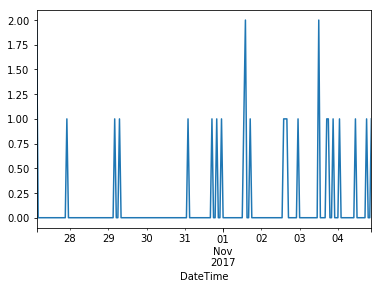

In [11]:
hashtag_tweets('#GoGreater') #small test hashtag

Downloaded 100 tweets
Downloaded 200 tweets
Downloaded 300 tweets
Downloaded 400 tweets
Downloaded 500 tweets
Downloaded 600 tweets
Downloaded 700 tweets
Downloaded 800 tweets
Downloaded 900 tweets
Downloaded 1000 tweets
Downloaded 1100 tweets
Downloaded 1200 tweets
Downloaded 1300 tweets
Downloaded 1400 tweets
Downloaded 1500 tweets
Downloaded 1529 tweets
No more tweets found
Downloaded 1529 tweets, Saved to hashtag_tweets.csv


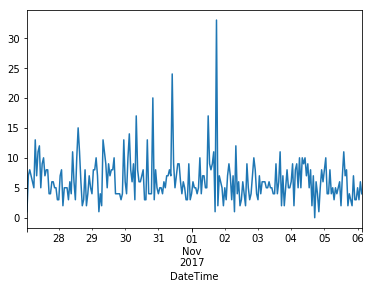

In [12]:
hashtag_tweets('#iPhone5s') #larger test hashtag

In [13]:
hashtag_tweets('#nationalsandwichday')

Downloaded 100 tweets
Downloaded 200 tweets


KeyboardInterrupt: 

In [ ]:
hashtag_tweets('#metoo')

In [ ]:
hashtag_tweets('#iphoneX')

In [ ]:
hashtag_tweets('#worldseriesgame7')